# Radiación de un cuerpo negro

In [21]:
import numpy as np ##Hago la declaración de la librería general
import matplotlib.pyplot as plt ##Declaro la librería que sirve para graficar
import scipy.constants as cte ##Declaro esta librería que sirve para obtener constantes

%matplotlib inline


In [22]:
##Hago la declaración de otrtas variables y obtengo los valores de las constantes conocidas gracias a la librería de scipy.constants
h=cte.Planck 
k=cte.Boltzmann
c=cte.c

print (h, k, c) ##IMprimo las constantes para ver si sí son correctas o no

6.62607004e-34 1.38064852e-23 299792458.0


In [23]:
datos=np.loadtxt('IRCF.txt') ##SE leen los datos de mi archivo "IRCF.txt" gracias a la función np.loadtxt y se ponen en una variable de tipo arreglo


In [66]:
frecuencia=datos[:,0] ##Se le otorga una variable a la columna #1 
intensidad=datos[:,1] ##Se le otorga una variable a la columna #2
intens=intensidad
barras=datos[:,3] ##Se le otorga una variable a la columna #4

##f=inputs[:,0:1] 
##e=inputs[:,1:2]
##I=inputs[:,3:4]

barrasMEGAS=barras*1e-3 ##Hago esto para convertir Megas en KIlo Jankys
y=np.linspace(0,0,(len(intensidad)))
error=np.linspace(0,0,(len(intensidad)))
t=np.linspace(1,5,100)
xg=4000
x=0
treal=0

Text(0.5,1,'Rad. Fondo microondas')

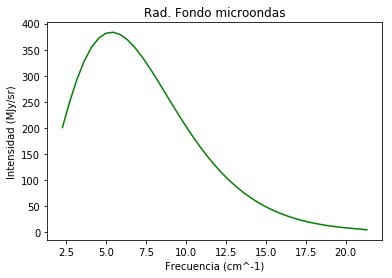

In [31]:
##Se grafica la frecuencia por la intensidad, incluyendo las barras de error con la función errorbar de plt.
plt.errorbar(frecuencia,intensidad,barrasMEGAS, color="green")
plt.xlabel('Frecuencia (cm^-1)') ##Pongo los labels en x y y
plt.ylabel('Intensidad (MJy/sr)')
plt.title ('Rad. Fondo microondas') ##POngo el titulo de la gráfica

Text(0,0.5,'Incertidumbre (MJy/sr)')

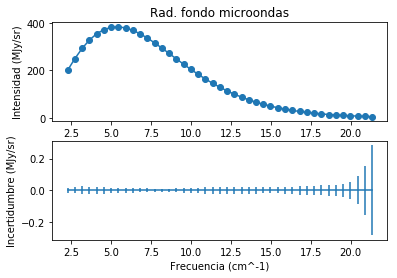

In [32]:
plt.subplot(2,1,1)
plt.plot(frecuencia, intensidad, '-o')
plt.xlabel('Frecuencia (cm^-1)') ##Pongo los labels en x y y
plt.ylabel('Intensidad (MJy/sr)')
plt.title ('Rad. fondo microondas') ##POngo el titulo de la gráfica


plt.subplot(2,1,2)
plt.errorbar(frecuencia,y, barrasMEGAS)
plt.xlabel('Frecuencia (cm^-1)') ##Pongo los labels en x y y
plt.ylabel('Incertidumbre (MJy/sr)')


In [37]:
def fx(frecuencia,t):
    f=frecuencia*c*10**2
    return((h*pow(f,3)))/(pow(c,2))*(1/((np.exp((h*f)/(k*t)))-1))*(10**20) ##Me está regresando la intensidad

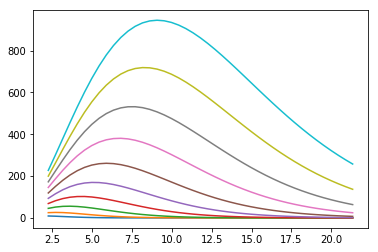

In [67]:
for j in range(len(t)):
    x=0
    o=fx(frecuencia, t[j])
    ##o=intensidad de esa temperatura
    
    for l in range(len(barras)):
        error[l]=((o[l]-o[l])/barrasMEGAS[l])**2
        x=x+error[l]
     
    if(x<xg):
        xg=x
        treal=t[j]
        
    if(j%10==0): 
        plt.plot(frecuencia,o)

#print(treal)
        
#o=fx(frecuencia,treal)     
#plt.scatter(frecuencia,intensidad)
#plt.scatter(frecuencia,o)
             
    

/usr/lib64/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


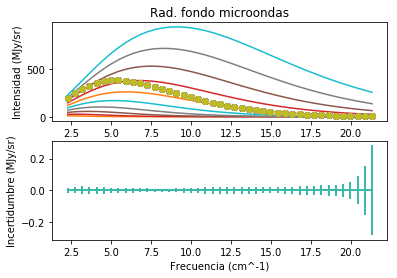

In [71]:
for j in range(len(t)):
    x=0
    o=fx(frecuencia, t[j])
    ##o=intensidad de esa temperatura
    
    for l in range(len(barras)):
        error[l]=((o[l]-o[l])/barrasMEGAS[l])**2
        x=x+error[l]
     
    if(x<xg):
        xg=x
        treal=t[j]
        
    if(j%10==0): 
        grafica(frecuencia,o,intens)


In [69]:
def grafica(frecuencia,intensidad,intens):
    plt.subplot(2,1,1)
    plt.plot(frecuencia, intens,'o')
    plt.plot(frecuencia, intensidad)
    plt.xlabel('Frecuencia (cm^-1)') ##Pongo los labels en x y y
    plt.ylabel('Intensidad (MJy/sr)')
    plt.title ('Rad. fondo microondas') ##POngo el titulo de la gráfica


    plt.subplot(2,1,2)
    plt.errorbar(frecuencia,y, barrasMEGAS)
    plt.xlabel('Frecuencia (cm^-1)') ##Pongo los labels en x y y
    plt.ylabel('Incertidumbre (MJy/sr)')
 

# Función Intensidad

In [14]:
##Hago la función In que tiene elementos de entrada de h, k y c (que son constantes) y de v y T (temperatura) que deben ser dadas por el usuario
def In(frecuencia):
    v=frecuencia
    v*=3e10
    T=np.linspace(1,100,10)
    for i in range (len(T)):
        z=((h*v**3)/c**2)*(1/((np.exp(h*v/k*T[i]))-1)) ##Se hace la operación para obtener la intensidad en función de la temperatura y de la frecuencia
        z=z*10e-26 ##Se convierten las unidades de la intensidad del SI a Jansky/s 
        print(z)
    return z ##Se devuelve al programa el valor de la intensidad

In [15]:
z= In(frecuencia)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
